In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data_Wrangling")

In [3]:
# Display basic information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   County_Name    638 non-null    object 
 1   StudyYear      638 non-null    int64  
 2   MHI            638 non-null    float64
 3   MHI_2018       638 non-null    float64
 4   TotalPop       638 non-null    int64  
 5   Households     638 non-null    int64  
 6   MCInfant       638 non-null    float64
 7   MCToddler      638 non-null    float64
 8   MCPreschool    638 non-null    float64
 9   MFCCInfant     638 non-null    float64
 10  MFCCToddler    638 non-null    float64
 11  MFCCPreschool  638 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 59.9+ KB


In [4]:
df.describe()


,StudyYear,MHI,MHI_2018,TotalPop,Households,MCInfant,MCToddler,MCPreschool,MFCCInfant,MFCCToddler,MFCCPreschool
count,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,2013.000000,57110.376708,62078.513621,6.498302e+05,2.166075e+05,270.840031,193.976003,193.976003,173.336489,160.905408,160.905408
std,3.164759,15145.245314,16160.518164,1.422954e+06,4.651976e+05,45.443604,35.998808,35.998808,33.600739,30.523047,30.523047
min,2008.000000,33286.440000,37033.500000,1.131000e+03,2.990000e+02,182.420000,145.630000,145.630000,128.530000,121.040000,121.040000
25%,2010.000000,45475.000000,49468.140000,4.530300e+04,1.826675e+04,242.010000,169.735000,169.735000,150.627500,140.090000,140.090000
50%,2013.000000,54344.000000,58854.580000,1.793075e+05,6.860300e+04,258.145000,182.360000,182.360000,166.400000,152.720000,152.720000
75%,2016.000000,66003.250000,71794.640000,6.916418e+05,2.150802e+05,296.402500,211.977500,211.977500,191.000000,175.267500,175.267500
max,2018.000000,116178.000000,116178.000000,1.010572e+07,3.306109e+06,462.330000,356.510000,356.510000,318.220000,305.090000,305.090000


In [5]:
# Display the first few rows of the DataFrame
df.head()

,County_Name,StudyYear,MHI,MHI_2018,TotalPop,Households,MCInfant,MCToddler,MCPreschool,MFCCInfant,MFCCToddler,MFCCPreschool
0,Alameda County,2008,70079.0,80590.85,1457169,518352,301.77,214.22,214.22,192.32,178.26,178.26
1,Alameda County,2009,68863.0,80569.71,1457095,520096,312.76,234.23,234.23,199.98,178.56,178.56
2,Alameda County,2010,69384.0,80485.44,1477980,532026,313.14,234.95,234.95,201.32,181.19,181.19
3,Alameda County,2011,70821.0,79319.52,1494876,536160,313.53,235.68,235.68,202.66,183.83,183.83
4,Alameda County,2012,71516.0,78667.60,1515136,539179,313.91,236.40,236.40,204.00,186.46,186.46


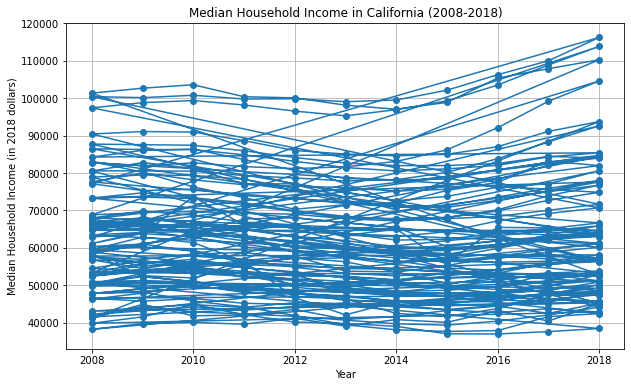

In [6]:
# Convert 'StudyYear' to datetime type for proper plotting
df['StudyYear'] = pd.to_datetime(df['StudyYear'], format='%Y')

# Plot wage growth over time
plt.figure(figsize=(10, 6))
plt.plot(df['StudyYear'], df['MHI_2018'], marker='o')
plt.xlabel('Year')
plt.ylabel('Median Household Income (in 2018 dollars)')
plt.title('Median Household Income in California (2008-2018)')
plt.grid(True)
plt.show()

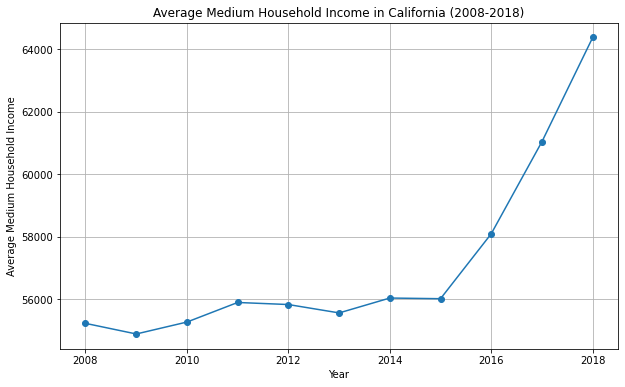

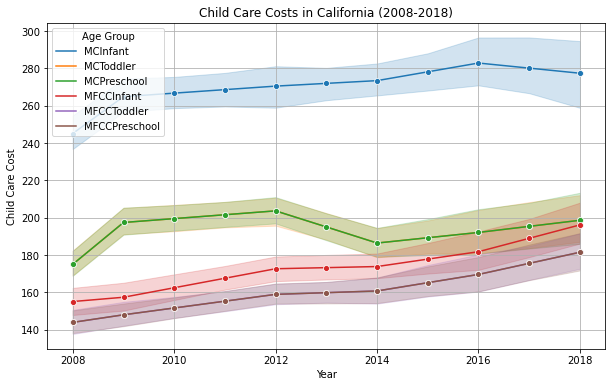

In [7]:
# Group the DataFrame by 'StudyYear' and calculate the average of MHI_2018 for each year
mhi_by_year = df.groupby('StudyYear')['MHI'].mean().reset_index()

# Create a DataFrame for just the child care cost columns and the 'StudyYear' column
childcare_cost_df = df[['StudyYear', 'MCInfant', 'MCToddler', 'MCPreschool', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool']]

# Melt the DataFrame to combine the child care cost columns
childcare_cost_df = childcare_cost_df.melt(id_vars='StudyYear', var_name='Age_Group', value_name='Child_Care_Cost')

# Plot average MHI_2018 over time
plt.figure(figsize=(10, 6))
plt.plot(mhi_by_year['StudyYear'], mhi_by_year['MHI'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Medium Household Income')
plt.title('Average Medium Household Income in California (2008-2018)')
plt.grid(True)
plt.show()

# Plot child care costs over time for different age groups (same code as before)
plt.figure(figsize=(10, 6))
sns.lineplot(data=childcare_cost_df, x='StudyYear', y='Child_Care_Cost', hue='Age_Group', marker='o')
plt.xlabel('Year')
plt.ylabel('Child Care Cost')
plt.title('Child Care Costs in California (2008-2018)')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left')
plt.show()

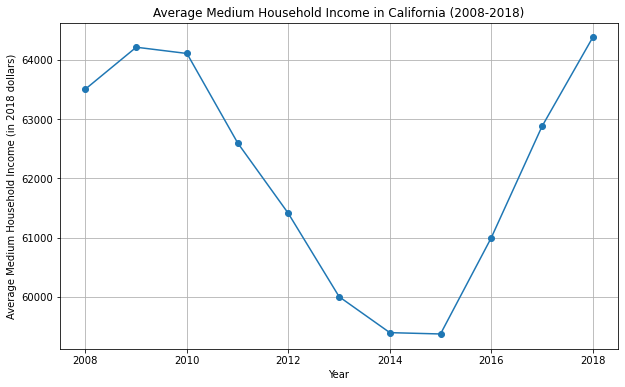

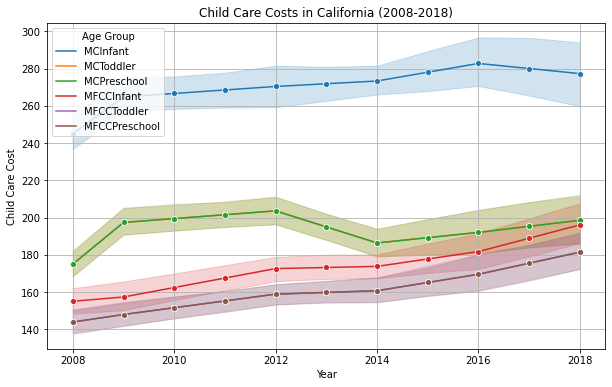

In [8]:
# Group the DataFrame by 'StudyYear' and calculate the average of MHI_2018 for each year
average_mhi_2018_by_year = df.groupby('StudyYear')['MHI_2018'].mean().reset_index()

# Create a DataFrame for just the child care cost columns and the 'StudyYear' column
childcare_cost_df = df[['StudyYear', 'MCInfant', 'MCToddler', 'MCPreschool', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool']]

# Melt the DataFrame to combine the child care cost columns
childcare_cost_df = childcare_cost_df.melt(id_vars='StudyYear', var_name='Age_Group', value_name='Child_Care_Cost')

# Plot average MHI_2018 over time
plt.figure(figsize=(10, 6))
plt.plot(average_mhi_2018_by_year['StudyYear'], average_mhi_2018_by_year['MHI_2018'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Medium Household Income (in 2018 dollars)')
plt.title('Average Medium Household Income in California (2008-2018)')
plt.grid(True)
plt.show()

# Plot child care costs over time for different age groups (same code as before)
plt.figure(figsize=(10, 6))
sns.lineplot(data=childcare_cost_df, x='StudyYear', y='Child_Care_Cost', hue='Age_Group', marker='o')
plt.xlabel('Year')
plt.ylabel('Child Care Cost')
plt.title('Child Care Costs in California (2008-2018)')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left')
plt.show()

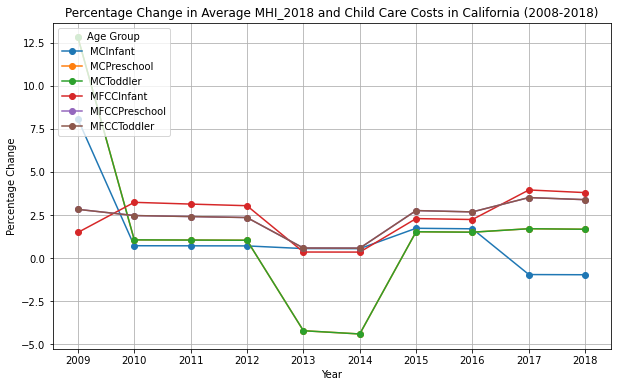

In [9]:
# Create a DataFrame for child care costs with the 'StudyYear' and individual cost columns
childcare_cost_df = df[['StudyYear', 'MCInfant', 'MCToddler', 'MCPreschool', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool']]

# Melt the DataFrame to combine the child care cost columns
childcare_cost_df = childcare_cost_df.melt(id_vars='StudyYear', var_name='Age_Group', value_name='Child_Care_Cost')

# Group the child care cost DataFrame by 'StudyYear', 'Age_Group', and calculate the average cost for each year and age group
average_childcare_cost_by_year = childcare_cost_df.groupby(['StudyYear', 'Age_Group'])['Child_Care_Cost'].mean().reset_index()

# Calculate the percentage change in average MHI_2018 and child care costs over time for each age group
average_mhi_2018_by_year['MHI_2018_Percent_Change'] = average_mhi_2018_by_year['MHI_2018'].pct_change() * 100
average_childcare_cost_by_year['Child_Care_Cost_Percent_Change'] = average_childcare_cost_by_year.groupby('Age_Group')['Child_Care_Cost'].pct_change() * 100

# Plot the percentage change in average MHI_2018 and child care costs over time for each age group
plt.figure(figsize=(10, 6))
for age_group in average_childcare_cost_by_year['Age_Group'].unique():
    age_group_data = average_childcare_cost_by_year[average_childcare_cost_by_year['Age_Group'] == age_group]
    plt.plot(age_group_data['StudyYear'], age_group_data['Child_Care_Cost_Percent_Change'], label=age_group, marker='o')

plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Average MHI_2018 and Child Care Costs in California (2008-2018)')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left')
plt.show()

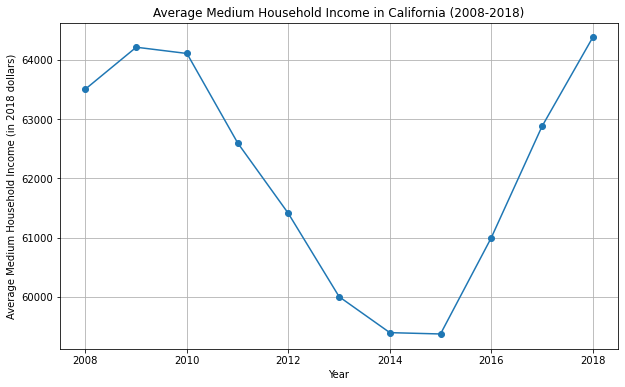

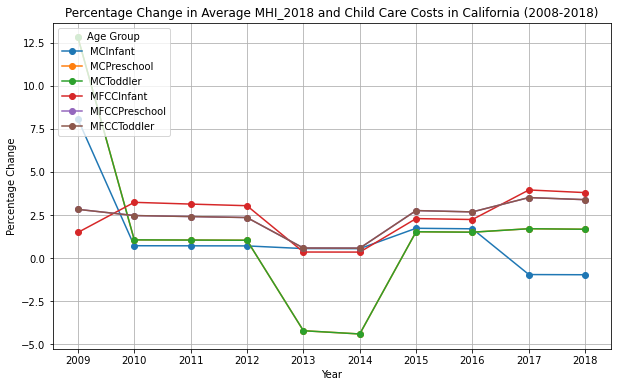

In [10]:
# Rename the column 'Medium household income in 2018 dollars' to 'MHI_2018'
df.rename(columns={'Medium household income in 2018 dollars': 'MHI_2018'}, inplace=True)

# Group the DataFrame by 'StudyYear' and calculate the average of MHI_2018 for each year
average_mhi_2018_by_year = df.groupby('StudyYear')['MHI_2018'].mean().reset_index()

# Plot average MHI_2018 over time
plt.figure(figsize=(10, 6))
plt.plot(average_mhi_2018_by_year['StudyYear'], average_mhi_2018_by_year['MHI_2018'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Medium Household Income (in 2018 dollars)')
plt.title('Average Medium Household Income in California (2008-2018)')
plt.grid(True)
plt.show()

# Create a DataFrame for child care costs with the 'StudyYear' and individual cost columns
childcare_cost_df = df[['StudyYear', 'MCInfant', 'MCToddler', 'MCPreschool', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool']]

# Melt the DataFrame to combine the child care cost columns
childcare_cost_df = childcare_cost_df.melt(id_vars='StudyYear', var_name='Age_Group', value_name='Child_Care_Cost')

# Group the child care cost DataFrame by 'StudyYear', 'Age_Group', and calculate the average cost for each year and age group
average_childcare_cost_by_year = childcare_cost_df.groupby(['StudyYear', 'Age_Group'])['Child_Care_Cost'].mean().reset_index()

# Calculate the percentage change in average MHI_2018 and child care costs over time for each age group
average_mhi_2018_by_year['MHI_2018_Percent_Change'] = average_mhi_2018_by_year['MHI_2018'].pct_change() * 100
average_childcare_cost_by_year['Child_Care_Cost_Percent_Change'] = average_childcare_cost_by_year.groupby('Age_Group')['Child_Care_Cost'].pct_change() * 100

# Plot the percentage change in average MHI_2018 and child care costs over time for each age group
plt.figure(figsize=(10, 6))
for age_group in average_childcare_cost_by_year['Age_Group'].unique():
    age_group_data = average_childcare_cost_by_year[average_childcare_cost_by_year['Age_Group'] == age_group]
    plt.plot(age_group_data['StudyYear'], age_group_data['Child_Care_Cost_Percent_Change'], label=age_group, marker='o')

plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Average MHI_2018 and Child Care Costs in California (2008-2018)')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left')
plt.show()

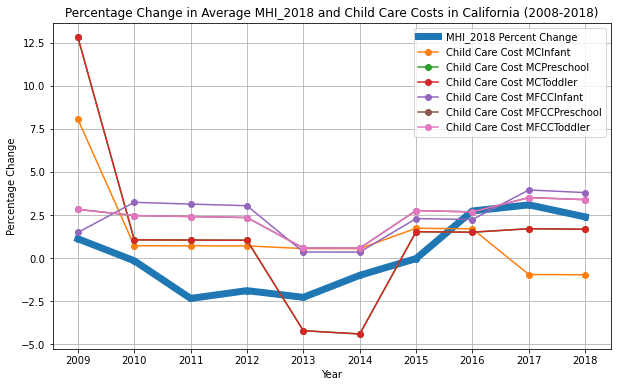

In [11]:
# Create a DataFrame for child care costs with the 'StudyYear' and individual cost columns
childcare_cost_df = df[['StudyYear', 'MCInfant', 'MCToddler', 'MCPreschool', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool']]

# Melt the DataFrame to combine the child care cost columns
childcare_cost_df = childcare_cost_df.melt(id_vars='StudyYear', var_name='Age_Group', value_name='Child_Care_Cost')

# Group the child care cost DataFrame by 'StudyYear', 'Age_Group', and calculate the average cost for each year and age group
average_childcare_cost_by_year = childcare_cost_df.groupby(['StudyYear', 'Age_Group'])['Child_Care_Cost'].mean().reset_index()

# Calculate the percentage change in child care costs over time for each age group
average_childcare_cost_by_year['Child_Care_Cost_Percent_Change'] = average_childcare_cost_by_year.groupby('Age_Group')['Child_Care_Cost'].pct_change() * 100

# Plot the percentage change in average MHI_2018 and child care costs over time for each age group
plt.figure(figsize=(10, 6))
plt.plot(average_mhi_2018_by_year['StudyYear'], average_mhi_2018_by_year['MHI_2018_Percent_Change'], marker='o', label='MHI_2018 Percent Change', linewidth=7.0)  
for age_group in average_childcare_cost_by_year['Age_Group'].unique():
    age_group_data = average_childcare_cost_by_year[average_childcare_cost_by_year['Age_Group'] == age_group]
    plt.plot(age_group_data['StudyYear'], age_group_data['Child_Care_Cost_Percent_Change'], marker='o', label=f'Child Care Cost {age_group}')

plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Average MHI_2018 and Child Care Costs in California (2008-2018)')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# Columns representing the cost of daycare
daycare_columns = ['MCInfant', 'MCToddler', 'MCPreschool', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool']

# Multiply the cost of daycare by 52 for each age group to change from weekly to annual
df[daycare_columns] *= 52

In [13]:
df.head()

,County_Name,StudyYear,MHI,MHI_2018,TotalPop,Households,MCInfant,MCToddler,MCPreschool,MFCCInfant,MFCCToddler,MFCCPreschool
0,Alameda County,2008-01-01,70079.0,80590.85,1457169,518352,15692.04,11139.44,11139.44,10000.64,9269.52,9269.52
1,Alameda County,2009-01-01,68863.0,80569.71,1457095,520096,16263.52,12179.96,12179.96,10398.96,9285.12,9285.12
2,Alameda County,2010-01-01,69384.0,80485.44,1477980,532026,16283.28,12217.40,12217.40,10468.64,9421.88,9421.88
3,Alameda County,2011-01-01,70821.0,79319.52,1494876,536160,16303.56,12255.36,12255.36,10538.32,9559.16,9559.16
4,Alameda County,2012-01-01,71516.0,78667.60,1515136,539179,16323.32,12292.80,12292.80,10608.00,9695.92,9695.92


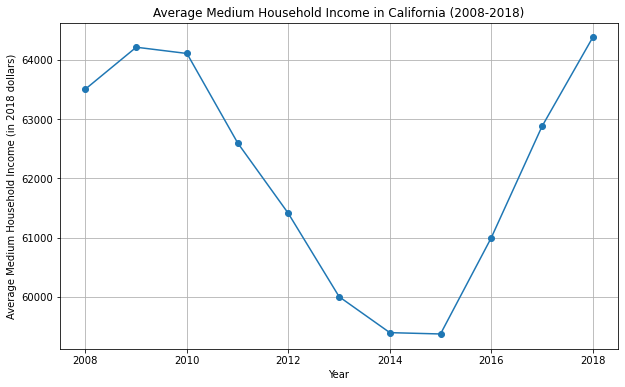

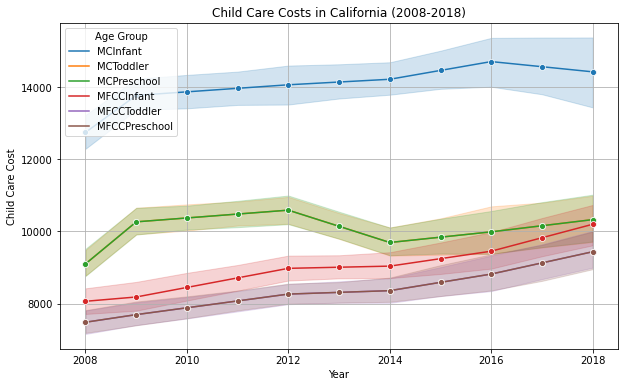

In [14]:
# Group the DataFrame by 'StudyYear' and calculate the average of MHI_2018 for each year
average_mhi_2018_by_year = df.groupby('StudyYear')['MHI_2018'].mean().reset_index()

# Create a DataFrame for just the child care cost columns and the 'StudyYear' column
childcare_cost_df = df[['StudyYear', 'MCInfant', 'MCToddler', 'MCPreschool', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool']]

# Melt the DataFrame to combine the child care cost columns
childcare_cost_df = childcare_cost_df.melt(id_vars='StudyYear', var_name='Age_Group', value_name='Child_Care_Cost')

# Plot average MHI_2018 over time
plt.figure(figsize=(10, 6))
plt.plot(average_mhi_2018_by_year['StudyYear'], average_mhi_2018_by_year['MHI_2018'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Medium Household Income (in 2018 dollars)')
plt.title('Average Medium Household Income in California (2008-2018)')
plt.grid(True)
plt.show()

# Plot child care costs over time for different age groups (same code as before)
plt.figure(figsize=(10, 6))
sns.lineplot(data=childcare_cost_df, x='StudyYear', y='Child_Care_Cost', hue='Age_Group', marker='o')
plt.xlabel('Year')
plt.ylabel('Child Care Cost')
plt.title('Child Care Costs in California (2008-2018)')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left')
plt.show()

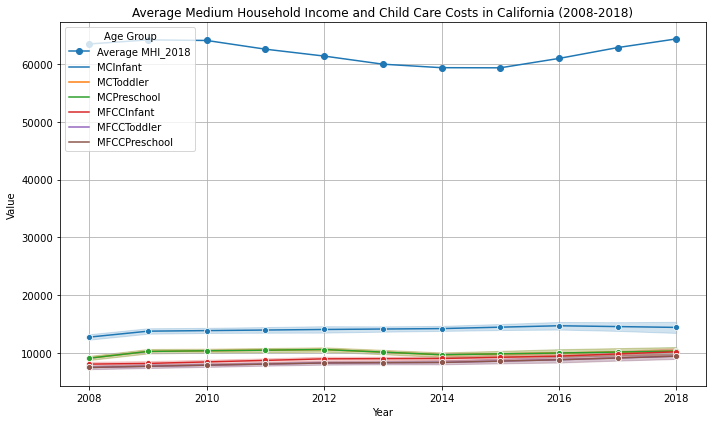

In [15]:
# Plot average MHI_2018 and child care costs over time on the same graph
plt.figure(figsize=(10, 6))

# Plot average MHI_2018 over time
plt.plot(average_mhi_2018_by_year['StudyYear'], average_mhi_2018_by_year['MHI_2018'], marker='o', label='Average MHI_2018')

# Plot child care costs over time for different age groups
sns.lineplot(data=childcare_cost_df, x='StudyYear', y='Child_Care_Cost', hue='Age_Group', marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average Medium Household Income and Child Care Costs in California (2008-2018)')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left')

# Show the combined plot
plt.tight_layout()
plt.show()


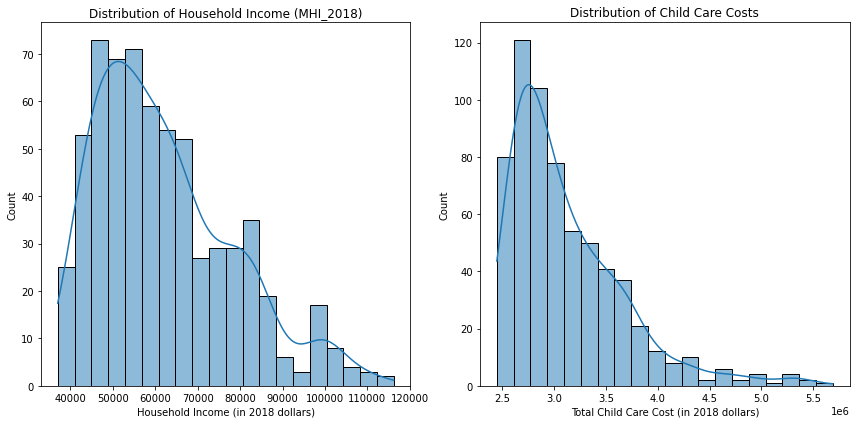

In [16]:
# Distribution of Household Income and Child Care Costs

# Columns representing the cost of daycare
daycare_columns = ['MCInfant', 'MCToddler', 'MCPreschool', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool']

# Multiply the cost of daycare by 52 for each age group
df[daycare_columns] *= 52

# Plot histograms for Household Income (MHI_2018) and Child Care Costs
plt.figure(figsize=(12, 6))

# Distribution of Household Income
plt.subplot(1, 2, 1)
sns.histplot(df['MHI_2018'], bins=20, kde=True)
plt.title('Distribution of Household Income (MHI_2018)')
plt.xlabel('Household Income (in 2018 dollars)')

# Distribution of Child Care Costs
plt.subplot(1, 2, 2)
child_care_total_cost = df[daycare_columns].sum(axis=1)
sns.histplot(child_care_total_cost, bins=20, kde=True)
plt.title('Distribution of Child Care Costs')
plt.xlabel('Total Child Care Cost (in 2018 dollars)')

plt.tight_layout()
plt.show()

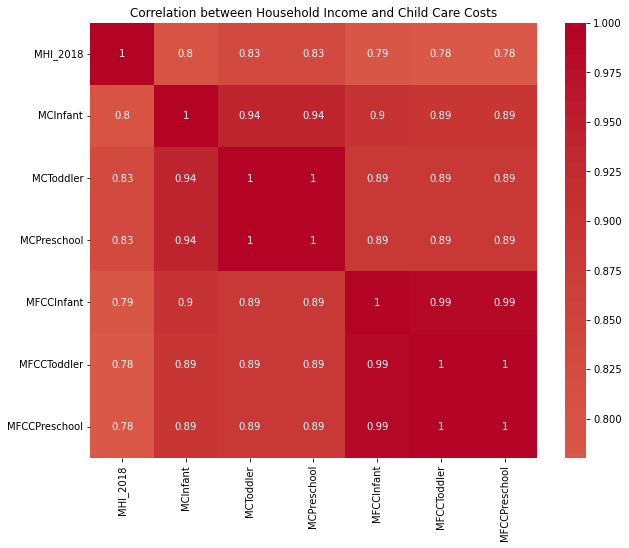

In [17]:
# Correlation Analysis between different variables
# Columns representing the cost of daycare
daycare_columns = ['MCInfant', 'MCToddler', 'MCPreschool', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool']

# Multiply the cost of daycare by 52 for each age group
df[daycare_columns] *= 52

# Calculate the correlation matrix
correlation_matrix = df[['MHI_2018'] + daycare_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Household Income and Child Care Costs')
plt.show()

In [18]:
pip install geopandas 

Note: you may need to restart the kernel to use updated packages.


In [19]:
import geopandas as gpd
import shapefile
import fiona 



In [20]:
type(gpd.io.file.fiona)

NoneType

In [21]:
# # Set SHAPE_RESTORE_SHX config option to YES
# # gpd.io.file.fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'rw+'

# # Load the shapefile
gdf_counties = gpd.read_file("CA_Counties_TIGER2016.shp")

In [22]:
gdf_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,NaN,NaN,NaN,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,NaN,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,NaN,42200,NaN,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,NaN,NaN,NaN,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,NaN,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [23]:
# Rename the column "NAMELSAD" to "County_Name"
gdf_counties = gdf_counties.rename(columns={"NAMELSAD": "County_Name"})

In [24]:
# Replace "County_Name" with the actual column name for county names in both datasets
# Make sure the values in "County_Name" match between the shapefile and your data
merged_gdf = gdf_counties.merge(df, on="County_Name")

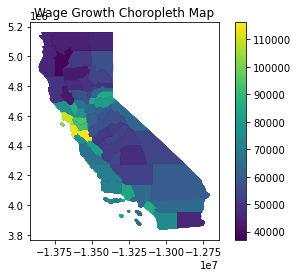

In [25]:
# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
merged_gdf.plot(column="MHI_2018", ax=ax, legend=True)
plt.title("Wage Growth Choropleth Map")
plt.show()

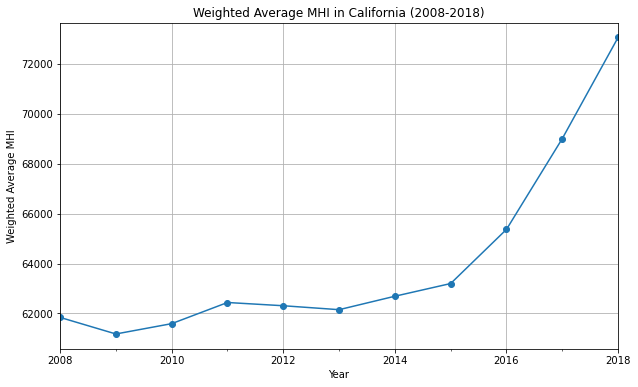

In [26]:
# Calculate the weighted average MHI for each year
# First, calculate the product of MHI and TotalPop for each row, then group by StudyYear and sum those products
# Finally, divide by the sum of TotalPop for each year to get the weighted average
weighted_avg_mhi = (df['MHI'] * df['TotalPop']).groupby(df['StudyYear']).sum() / df.groupby('StudyYear')['TotalPop'].sum()

# Create a line plot of weighted average MHI over the years
plt.figure(figsize=(10, 6))
weighted_avg_mhi.plot(marker='o')
plt.title('Weighted Average MHI in California (2008-2018)')
plt.xlabel('Year')
plt.ylabel('Weighted Average MHI')
plt.grid(True)
plt.show()